<img src="../images/aeropython_logo.png" alt="AeroPython" style="width: 300px;"/>

# Introducción a la sintaxis de Python II: librerías

_En esta clase continuaremos con nuestra introducción a Python. Para ello, analizaremos unos datos almacenados en una serie de archivos csv. Estos datos corresponden a la evolución de la inflamación de una serie de pacientes (filas) ante un tratamiento de artritis a lo largo de los días de tratamiento (columnas)._

Objetivos:

* Primer contacto con librerías: qué son y para qué se usan.
* Cargar una librería y acceder a sus contenidos.
* Leer datos de un archivo de texto y almacenarlos en un array.
* Acceder a elementos y secciones del array
* Operar con elementos del array.
* Representar los datos en gráficos sencillos.

---

###### Los materiales de esta clase son una adaptación de: http://swcarpentry.github.io/python-novice-inflammation/ distribuido bajo licencia [Creative Commons Attribution license](https://software-carpentry.org/license/)

## Cargando los datos

Para cargar los datos, haremos uso por primera vez de una librería. Las librerías empaquetan distintas funciones, estructuras de datos, variables... que pueden ser reutilizadas en otros programas. En este caso utilizaremos NumPy.

In [1]:
import numpy as np

Una vez que hemos importado una librería, podemos acceder a sus contenidos:

In [2]:
# Usando la función que carga los datos
np.loadtxt(fname='../data/swc/inflammation-01.csv', delimiter=',')

array([[ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  1.,  2., ...,  1.,  0.,  1.],
       [ 0.,  1.,  1., ...,  2.,  1.,  1.],
       ..., 
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  1., ...,  1.,  1.,  0.]])

La expresión `np.loadtxt(...)` es una llamada a una función que se llama `loadtxt` que pertenece a `numpy`. Veremos esta sintaxis que utiliza el punto para indicar la pertenencia en muchas más ocasiones a lo largo del curso.

En la línea anterior hemos cargado los datos, pero no los hemos almacenado en ninguna variable todavía.

In [3]:
# Almacenando los datos
data = np.loadtxt(fname='../data/swc/inflammation-01.csv', delimiter=',')

print(data)

[[ 0.  0.  1. ...,  3.  0.  0.]
 [ 0.  1.  2. ...,  1.  0.  1.]
 [ 0.  1.  1. ...,  2.  1.  1.]
 ..., 
 [ 0.  1.  1. ...,  1.  1.  1.]
 [ 0.  0.  0. ...,  0.  2.  0.]
 [ 0.  0.  1. ...,  1.  1.  0.]]


Podemos comprobar el tipo de dato que es `data` y el tipo de los valores que contiene:

In [4]:
# Tipo de data
type(data)

numpy.ndarray

In [5]:
# Tipo de los valores de data
data.dtype

dtype('float64')

Comprabamos que hemos obtenido un `numpy.ndarray`: un array es un __bloque de memoria que contiene elementos del mismo tipo__. Básicamente:

* nos _recuerdan_ a los vectores, matrices, tensores...
* podemos almacenar el array con un nombre y acceder a sus __elementos__ mediante sus __índices__.
* ayudan a gestionar de manera eficiente la memoria y a acelerar los cálculos.


---

| Índice     | 0     | 1     | 2     | 3     | ...   | n-1   | n  |
| ---------- | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| Valor      | 2.1   | 3.6   | 7.8   | 1.5   | ...   | 5.4   | 6.3 |

---

__¿Qué solemos guardar en arrays?__

* Vectores y matrices.
* Datos de experimentos:
    - En distintos instantes discretos.
    - En distintos puntos del espacio.
* Resultado de evaluar funciones con los datos anteriores.
* Discretizaciones para usar algoritmos de: integración, derivación, interpolación...
* ... 

Según hemos observado al imprimir el contenido de `data`, se trata de un array de dos dimensiones, pero ¿cuántos elementos tiene? ¿cuántos elementos tiene en cada dimensión?

In [6]:
data.size

2400

In [7]:
data.shape

(60, 40)

El resultado es que tiene 60 filas y 40 columnas, es decir, 2400 elementos.

`size` y  `shape` son atributos del array, esto es lo mismo que decir, que son variables ligadas al array.

### Accediendo a elementos del array 

Para acceder a elementos de un array, lo haremos entre paréntesis, al igual que hacíamos con listas y tuplas:

In [8]:
print('first value in data:', data[0, 0])

first value in data: 0.0


In [9]:
print('middle value in data:', data[30, 20])

middle value in data: 13.0


Recuerda que en Python **la indexación comienza en cero** como en C, C++, Java y Perl; a diferencia de lenguajes como MATLAB y Fortran (aunque en este último se puede elegir).

Por lo tanto, un array de M&times;N (M filas y N columnas) tiene índices que van desde 0 hasta M-1 y N-1. Al principio cuesta un poco acostumbrarse a esto.

### Accediendo a secciones del array 



Algo como `[30, 20]` accede a un solo elemento del array, pero se pueden seleccionar más elementos a la vez usando la sintaxis `[start:stop:step]`. Por ejemplo, podemos acceder a los primeros diez días para los primeros cuatro pacientes.

![indexing](../images/indexing.png)

In [10]:
# primeros diez días para los primeros cuatro pacientes
print(data[0:4, 0:10])

[[ 0.  0.  1.  3.  1.  2.  4.  7.  8.  3.]
 [ 0.  1.  2.  1.  2.  1.  3.  2.  2.  6.]
 [ 0.  1.  1.  3.  3.  2.  6.  2.  5.  9.]
 [ 0.  0.  2.  0.  4.  2.  2.  1.  6.  7.]]


En realidad, no hace falta que pongamos el valor inicial si es cero.

In [11]:
print(data[:4, :10])

[[ 0.  0.  1.  3.  1.  2.  4.  7.  8.  3.]
 [ 0.  1.  2.  1.  2.  1.  3.  2.  2.  6.]
 [ 0.  1.  1.  3.  3.  2.  6.  2.  5.  9.]
 [ 0.  0.  2.  0.  4.  2.  2.  1.  6.  7.]]


y podemos acceder a cualquier otra sección:

In [12]:
print(data[5:10, 0:10])

[[ 0.  0.  1.  2.  2.  4.  2.  1.  6.  4.]
 [ 0.  0.  2.  2.  4.  2.  2.  5.  5.  8.]
 [ 0.  0.  1.  2.  3.  1.  2.  3.  5.  3.]
 [ 0.  0.  0.  3.  1.  5.  6.  5.  5.  8.]
 [ 0.  1.  1.  2.  1.  3.  5.  3.  5.  8.]]


así como saltarnos elementos:

In [13]:
print(data[0:10:3, 0:10:2])

[[ 0.  1.  1.  4.  8.]
 [ 0.  2.  4.  2.  6.]
 [ 0.  2.  4.  2.  5.]
 [ 0.  1.  1.  5.  5.]]


Y recuerda que el último no está incluido

In [14]:
# Tomando una sección más pequeña
small = data[:3, 36:]

small

array([[ 2.,  3.,  0.,  0.],
       [ 1.,  1.,  0.,  1.],
       [ 2.,  2.,  1.,  1.]])

NumPy no solo nos provee de una estructura para almacenar elementos de una manera eficiente, sino también de muchas funciones para realizar operaciones con ellos. Por ejemplo, podemos obtener la inflamación media:

In [15]:
data.mean()

6.1487499999999997

La función media, está disponible como **función** (`np.mean`) y como **método** de un array (`ndarray.mean()`). Las funciones ya las conocemos, se puede decir que un método es una función que pertenece a un elemento, del mismo modo que las variables que pertenecen a ese elemento se llaman atributos.

Los arrays de NumPy tienen numerosos métodos:

In [16]:
# máximo
print('maximum inflammation:', data.max())
# mínimo
print('minimum inflammation:', data.min())
# desviación standard
print('standard deviation:', data.std())

maximum inflammation: 20.0
minimum inflammation: 0.0
standard deviation: 4.61383319712


Cuando se analizan datos, es típico aplicar estas funciones a partes del array, por ejemplo: a un paciente en concreto o un día en concreto. Podríamos hacer algo así:

In [17]:
# Seleccionando el primer paciente
patient_0 = data[0, :] 
# Calculando su máximo
print('maximum inflammation for patient 0:', patient_0.max())

maximum inflammation for patient 0: 18.0


Si queremos hacer esto para cada paciente, podemos aplicar esta operación a uno de los ejes al completo, en nuestro caso, querríamos la media a lo largo de cada fila, es decir, calcular la media a lo largo de las columnas (`axis = 1`)

<img src="../images/swc_img/python-operations-across-axes.svg" alt="Operations Across Axes" />

In [18]:
data.mean(axis=1)

array([ 5.45 ,  5.425,  6.1  ,  5.9  ,  5.55 ,  6.225,  5.975,  6.65 ,
        6.625,  6.525,  6.775,  5.8  ,  6.225,  5.75 ,  5.225,  6.3  ,
        6.55 ,  5.7  ,  5.85 ,  6.55 ,  5.775,  5.825,  6.175,  6.1  ,
        5.8  ,  6.425,  6.05 ,  6.025,  6.175,  6.55 ,  6.175,  6.35 ,
        6.725,  6.125,  7.075,  5.725,  5.925,  6.15 ,  6.075,  5.75 ,
        5.975,  5.725,  6.3  ,  5.9  ,  6.75 ,  5.925,  7.225,  6.15 ,
        5.95 ,  6.275,  5.7  ,  6.1  ,  6.825,  5.975,  6.725,  5.7  ,
        6.25 ,  6.4  ,  7.05 ,  5.9  ])

As a quick check,
we can ask this array what its shape is:

In [19]:
data.mean(axis=1).shape

(60,)

Por supuesto, también podemos obtener la media diaría de la inflamación:

In [20]:
data.mean(axis=0)

array([  0.        ,   0.45      ,   1.11666667,   1.75      ,
         2.43333333,   3.15      ,   3.8       ,   3.88333333,
         5.23333333,   5.51666667,   5.95      ,   5.9       ,
         8.35      ,   7.73333333,   8.36666667,   9.5       ,
         9.58333333,  10.63333333,  11.56666667,  12.35      ,
        13.25      ,  11.96666667,  11.03333333,  10.16666667,
        10.        ,   8.66666667,   9.15      ,   7.25      ,
         7.33333333,   6.58333333,   6.06666667,   5.95      ,
         5.11666667,   3.6       ,   3.3       ,   3.56666667,
         2.48333333,   1.5       ,   1.13333333,   0.56666667])

##### Ejercicio

No sólo de un array se pueden hacer secciones, ya hemos visto que las listas y tuples también lo permitían y a lo largo del curso nos toparemos con otras colecciones de datos a las que se puede acceder de este modo. Vamos a usar el slicing sobre los strings:

Partiremos del string `"oxygen"`:

In [21]:
# preserve
element = 'oxygen'

1.  ¿Qué devuelve `element[:4]`? 
    ¿y  `element[4:]`?
    ¿y `element[:]`?

2.  ¿Qué valor tiene `element[-1]`?
    ¿y `element[-2]`?
    Dados estos resultados, ¿qué hace  `element[1:-1]`?

3.  La expresión `element[3:3]` produce una cadena vacía 
    ¿qué devuelve `data[3:3, 4:4]`?
    ¿y  `data[3:3, :]`?

## Visualización

Una de las mejores maneras de extraer información de nuestros datoas es representarlos. Hagamos una pequeña introducción a la visualización con matplotlib. Ya habrá tiempo de introducirnos en los detalles, pero tratemos de mostrar gráficamente los datos de inflamación.

Empecemos con la *función mágica*:

In [22]:
%matplotlib inline

Las funciones mágicas son funciones propias de IPython. En este caso está indicando que la salida de la representación quede embebida en el Notebook

Ahora importaremos el módulo pyplot de matplotlib:

In [23]:
import matplotlib.pyplot as plt

y representemos todos los datos:

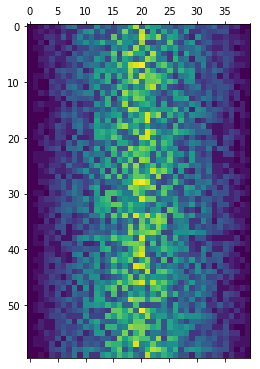

In [24]:
plt.matshow(data)

Las regiones azules corresponden a valores bajos de inflamación, mientras que las amarillas indican valores más altos. Se puede ver como a lo largo de los cuarenta días la inflamación aumenta y luego disminuye en todos los pacientes.

Podemos representar ahora la inflamación media de todos los pacientes para cada día 

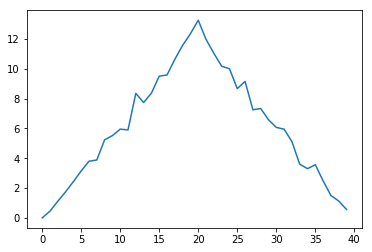

In [25]:
ave_inflammation = data.mean(axis=0)
plt.plot(ave_inflammation)

veamos también la inflamación máxima y mínima:

maximum inflammation per day


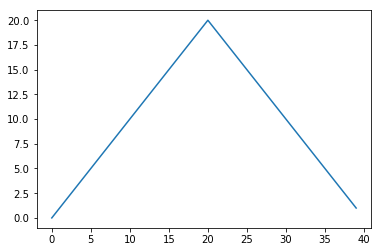

minimum inflammation per day


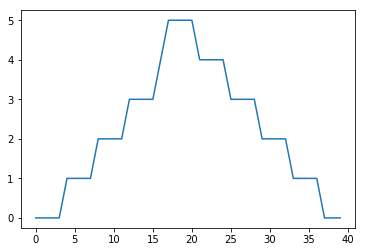

In [26]:
print('maximum inflammation per day')
plt.plot(data.max(axis=0))
plt.show()

print('minimum inflammation per day')
plt.plot(data.min(axis=0))
plt.show()

##### Ejercicio 

1. Crea una gráfica que muestre la desviación típica de los datos cada día para todos los pacientes
2. Crea una gráfica que muestre a la vez la inflamación máxima, media y mínima para cada día.

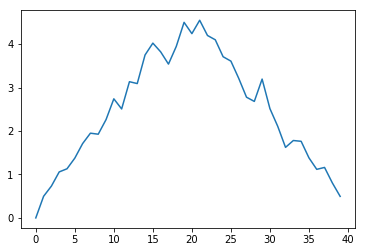

In [27]:
plt.plot(data.std(axis=0))

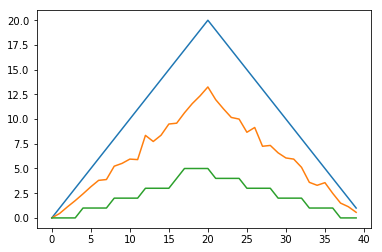

In [28]:
plt.plot(data.max(axis=0))
plt.plot(data.mean(axis=0))
plt.plot(data.min(axis=0))

---
** En definitiva**:
* Hemos importado una librería por primera vez y lo hemos hecho con un alias.
* Hemos visto como acceder a atributos  de los arrays como `shape` y `size`, así como a métodos como `max` o `std`.
* Hemos visto como acceder a elementos y secciones de un array
* Hemos visto como aplicar algunos de los métodos sólo a las columnas o las filas de un array.
* Hemos hecho nuestras primeras representaciones con matplotlib

###### Los materiales de esta clase son una adaptación de: http://swcarpentry.github.io/python-novice-inflammation/ distribuido bajo licencia [Creative Commons Attribution license](https://software-carpentry.org/license/)

###### Mabel Delgado, Alejandro Sáez

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [29]:
# preserve
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/aeropython.css'
HTML(open(css_file, "r").read())